<a href="https://colab.research.google.com/github/LohithVarun/CSA4736-DeepLearningPrograms/blob/main/Program-13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

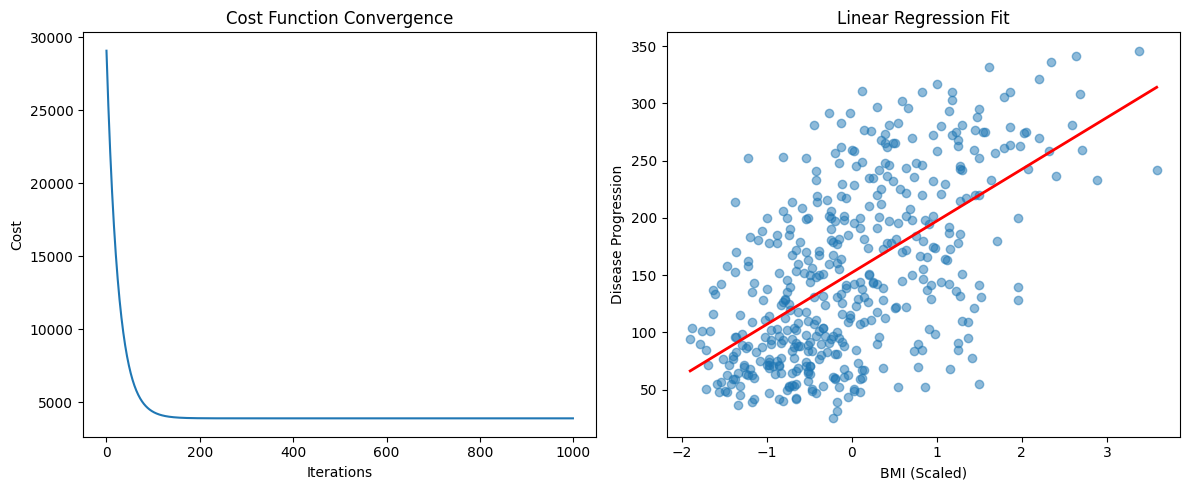

Final parameters: theta0 = 152.1335, theta1 = 45.1600
Final cost: 3890.4566


In [7]:
#R.Lohith Varun 192224215
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
X = diabetes.data[:, 2:3]
y = diabetes.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(2)
    cost_history = []
    X_b = np.c_[np.ones((m, 1)), X]

    for i in range(iterations):
        prediction = np.dot(X_b, theta)
        error = prediction - y
        gradients = 2/m * X_b.T.dot(error)
        theta = theta - learning_rate * gradients
        cost = np.mean(error ** 2)
        cost_history.append(cost)

    return theta, cost_history

theta, cost_history = gradient_descent(X_scaled, y)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled, y, alpha=0.5)
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
X_plot_b = np.c_[np.ones((100, 1)), X_plot]
y_plot = np.dot(X_plot_b, theta)
plt.plot(X_plot, y_plot, 'r-', linewidth=2)
plt.xlabel('BMI (Scaled)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression Fit')

plt.tight_layout()
plt.show()

print(f"Final parameters: theta0 = {theta[0]:.4f}, theta1 = {theta[1]:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")